In [522]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import  numpy as np

#### Importons la base de données Iris

In [523]:
df_iris = pd.read_csv('Iris.csv')

#### On va enlever Id de la base de données Iris

In [524]:
df_iris = df_iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]]

In [525]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [526]:
df_iris.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [527]:
if 'target' in df_iris.columns:
    print("\nContenu de la colonne 'target' :")
    print(df_iris['target'])

In [528]:
X = df_iris.drop(columns=["Species"])
y = df_iris["Species"]

#### Répartion des fonctionnalités et cibles

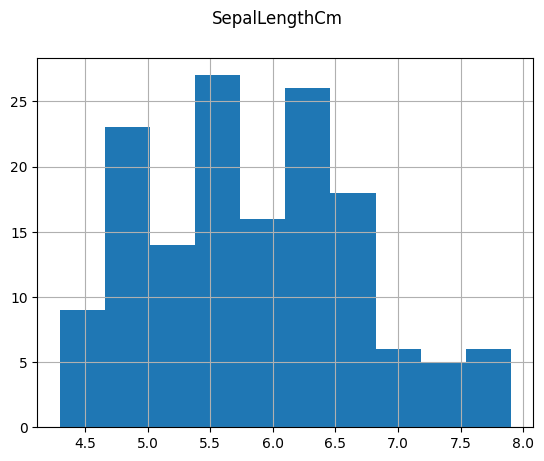

In [529]:
col = "SepalLengthCm"
df_iris[col].hist()
plt.suptitle(col)
plt.show()

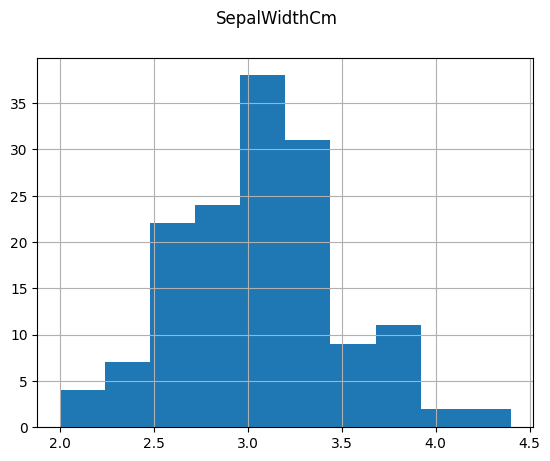

In [530]:
col = "SepalWidthCm"
df_iris[col].hist()
plt.suptitle(col)
plt.show()

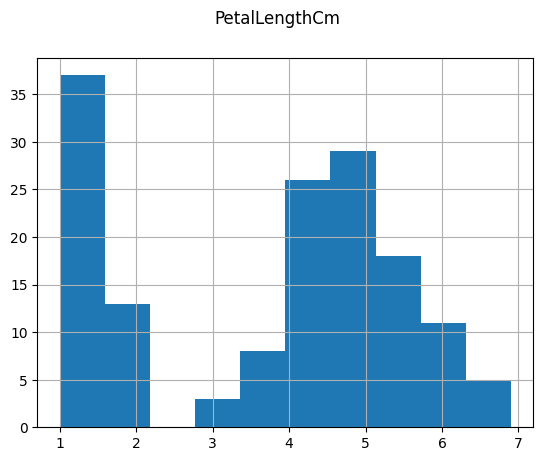

In [531]:
col = "PetalLengthCm"
df_iris[col].hist()
plt.suptitle(col)
plt.show()

#### Je mets bins = un chiffre de mon choix pour avoir un graphe plus aéré

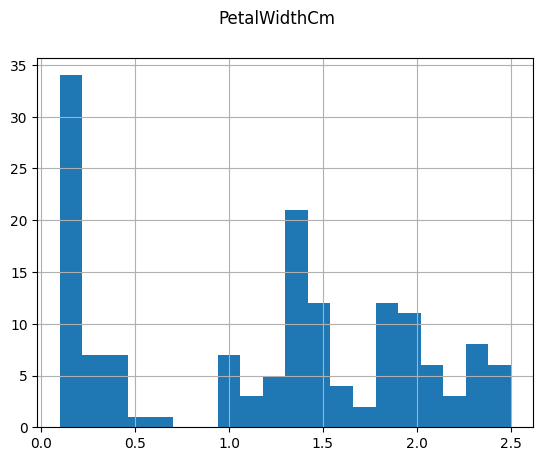

In [532]:
col = "PetalWidthCm"
df_iris[col].hist(bins=20) 
plt.suptitle(col)
plt.show()

#### Relation entre les caractéristiques et les cibles

In [533]:
df_iris['target'] = df_iris['Species'].astype('category').cat.codes


In [534]:
df_iris["target"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int8

### Créer une colonne feature_names

In [535]:
df_iris['target_names']= df_iris['target'].map({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica" })


### Description basique 

In [536]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Distributions et Relations des features et des targets

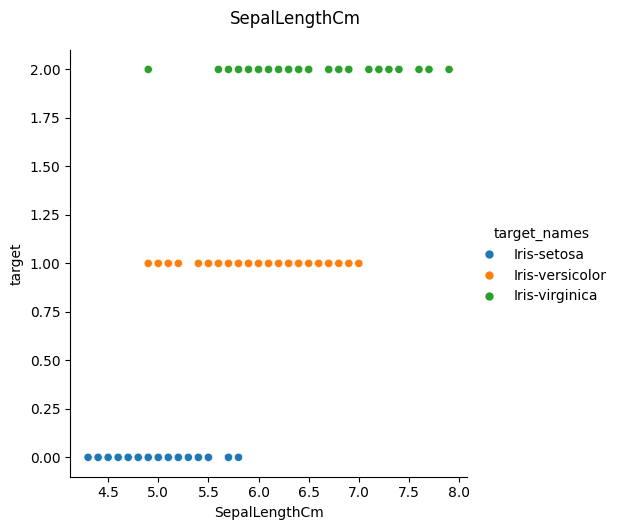

In [537]:
### on ajoute _ = et y=1.05 pour donner la distance entre le titre et le graphe
col="SepalLengthCm"
sns.relplot(x=col, y= "target", hue= "target_names", data=df_iris)
_ = plt.suptitle(col, y=1.05)  

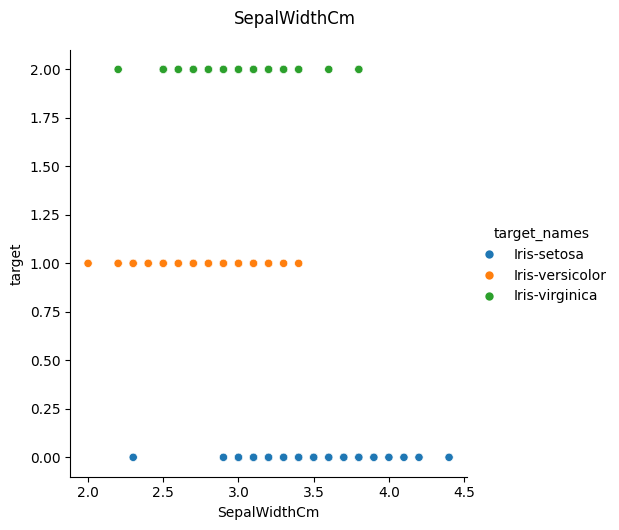

In [538]:
col="SepalWidthCm"
sns.relplot(x=col, y= "target", hue= "target_names", data=df_iris)
_ = plt.suptitle(col, y=1.05)

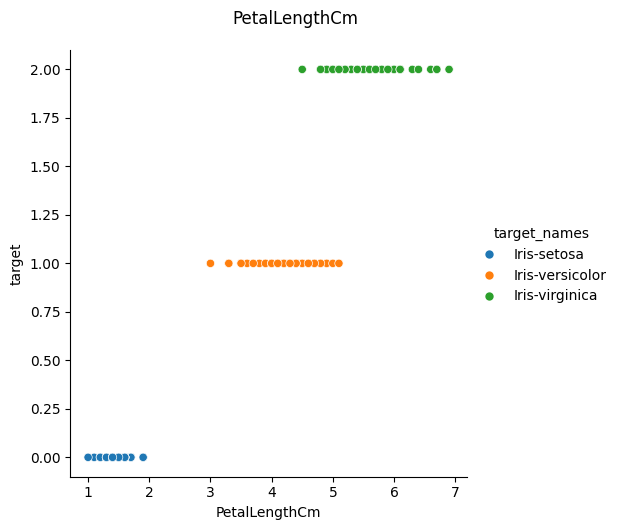

In [539]:
col="PetalLengthCm"
sns.relplot(x=col, y= "target", hue= "target_names", data=df_iris)
_ = plt.suptitle(col, y=1.05)

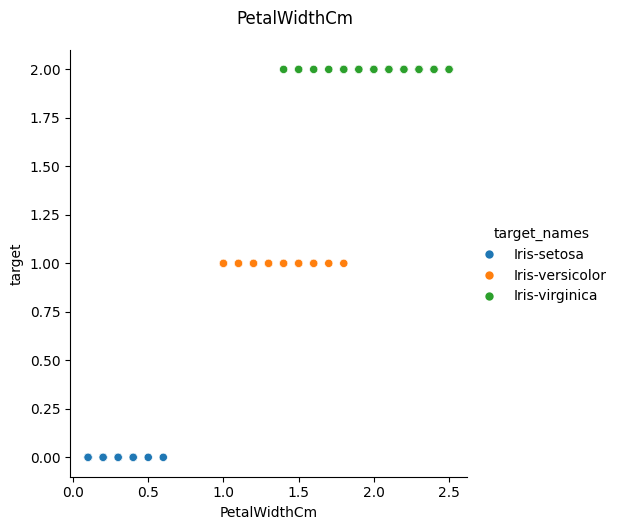

In [540]:
col="PetalWidthCm"
sns.relplot(x=col, y= "target", hue= "target_names", data=df_iris)
_ = plt.suptitle(col, y=1.05)

###  Analyse exploratoire des données (EDA) Pairplots

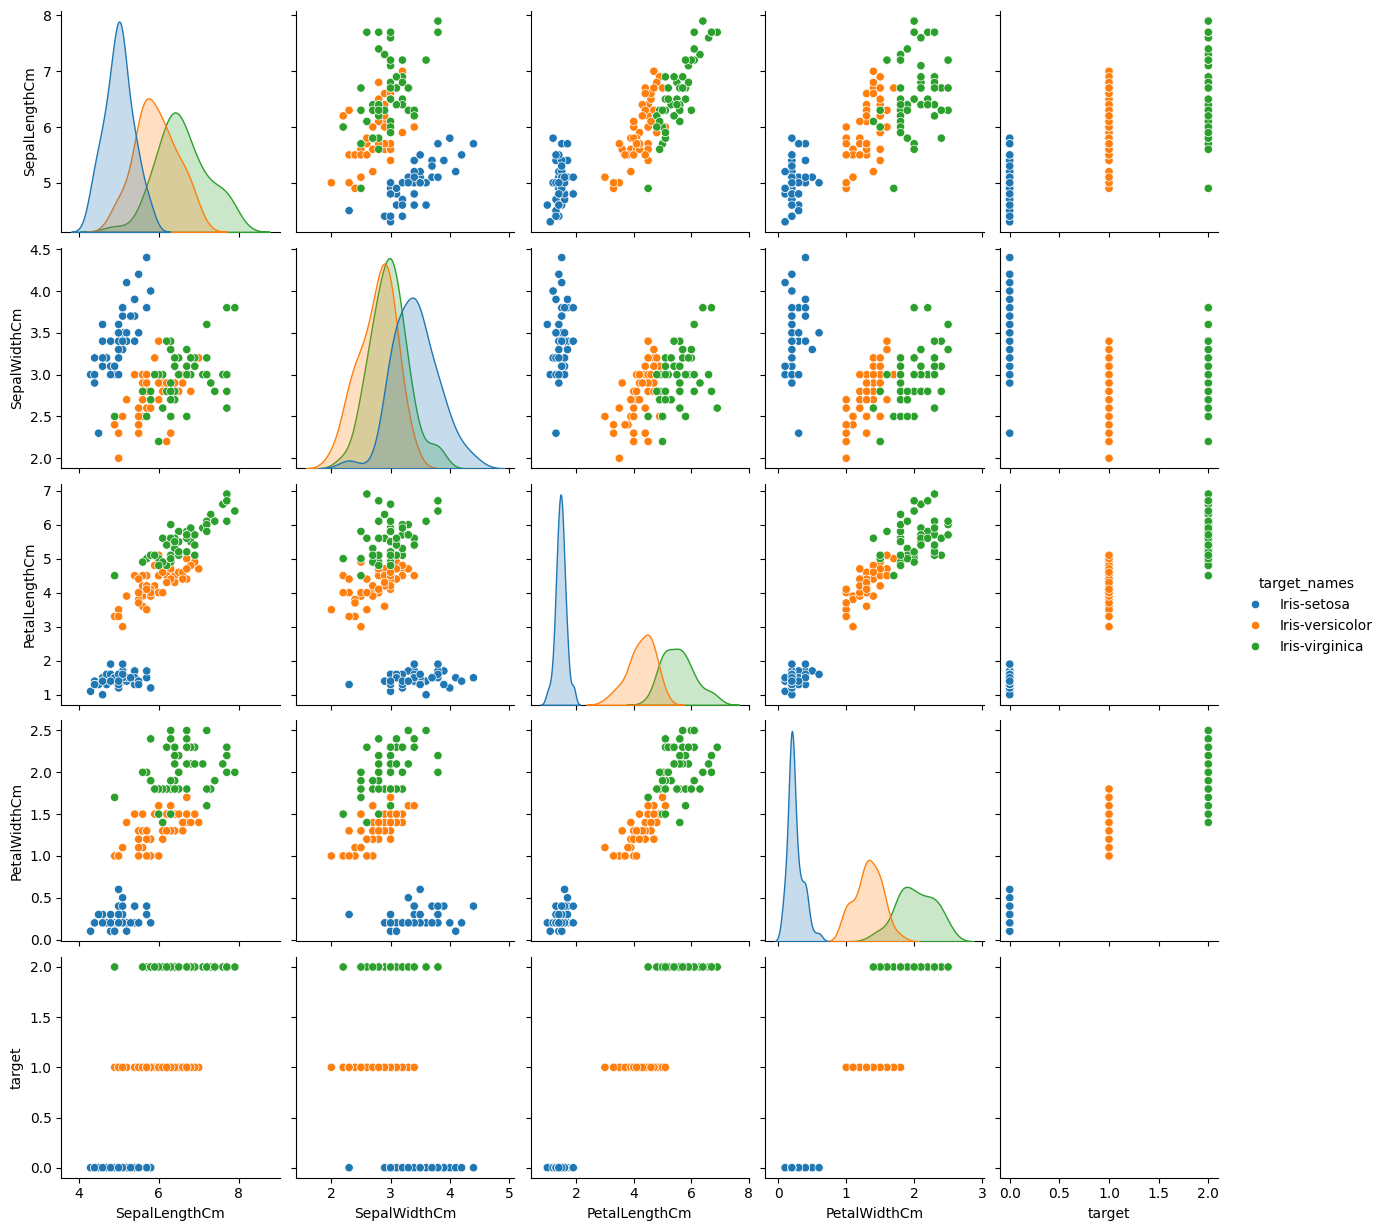

In [541]:
sns.pairplot(df_iris, hue="target_names")

##### Train test split

In [542]:
from sklearn.model_selection import train_test_split
df_train, df_test =train_test_split(df_iris, test_size=0.25)

In [543]:
df_train.shape

(112, 7)

In [544]:
df_test.shape

(38, 7)

In [545]:
df_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target,target_names
142,5.8,2.7,5.1,1.9,Iris-virginica,2,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica,2,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor,1,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica,2,Iris-virginica


In [546]:
df_train = df_train[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "target", "target_names"]]
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target,target_names
142,5.8,2.7,5.1,1.9,2,Iris-virginica
127,6.1,3.0,4.9,1.8,2,Iris-virginica
51,6.4,3.2,4.5,1.5,1,Iris-versicolor
63,6.1,2.9,4.7,1.4,1,Iris-versicolor
145,6.7,3.0,5.2,2.3,2,Iris-virginica
...,...,...,...,...,...,...
54,6.5,2.8,4.6,1.5,1,Iris-versicolor
121,5.6,2.8,4.9,2.0,2,Iris-virginica
41,4.5,2.3,1.3,0.3,0,Iris-setosa
7,5.0,3.4,1.5,0.2,0,Iris-setosa


### Preparez notre data pour la modélisation

In [547]:
x_train = df_train.drop(columns=["target", "target_names"]).values
x_train.shape

(112, 4)

In [548]:
y_train =df_train["target"].values
y_train

array([2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0,
       0, 0], dtype=int8)

##### Quelle est notre base de référence?
 Quel est le modèle le plus simple auquel nous puissions penser?
 Dans ce cas, si notre modèle de base consiste simplement à deviner au hasard l'espèce de fleur ou à deviner une seule espèce pour chaque
 point de données, nous nous attendrions à avoir une précision du modèle de 0,33 ou 33 %, puisque nous avons 3 classes différentes qui sont également équilibrées.
 Donc nos modèles devraient au moins battre une précision de 33 %

In [549]:
def single_feature_prediction(petalLenght):
    ### predire l'espèce d'iris 
    if petalLenght <2.5:
        return 0
    elif petalLenght <4.8:
      return 1
    else:
        return 2

In [550]:
df_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'target', 'target_names'],
      dtype='object')

In [551]:
x_train[:, 2]

array([5.1, 4.9, 4.5, 4.7, 5.2, 4.2, 1.7, 4. , 1.6, 5.6, 5.6, 6.3, 1.3,
       1.4, 6.1, 1.5, 4.8, 1.5, 4. , 6.1, 1.4, 5.7, 1.9, 5.5, 1.5, 3.9,
       6.4, 5.6, 5.5, 3.8, 5.1, 5.9, 3.3, 6.1, 6. , 1.6, 4.5, 1.4, 1.9,
       1.4, 1.4, 1.5, 5.3, 5. , 5.7, 5.7, 1.6, 5. , 4.4, 3.9, 4.3, 1.6,
       1.5, 4.7, 4.5, 6.7, 5.1, 4.2, 4.1, 4.7, 5. , 5.1, 1.4, 5.8, 1.4,
       5.6, 4.9, 1. , 4.7, 3.9, 1.5, 1.7, 5.5, 1.4, 4.8, 1.5, 4.2, 1.3,
       1.2, 4.8, 4.1, 3.7, 4.5, 1.3, 1.6, 4.4, 4.7, 4.6, 1.5, 5.3, 5.6,
       1.4, 5.1, 1.3, 4.5, 1.5, 5.8, 5.1, 4.5, 1.4, 4.9, 4.5, 4.8, 5. ,
       4.4, 5.1, 3. , 4.6, 4.9, 1.3, 1.5, 1.6])

In [552]:
manuel_prediction = np.array([single_feature_prediction(val) for val in x_train[:, 2]]) 

In [553]:
manuel_prediction

array([2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0,
       0, 0])

### Le résultat en bas nous donne True à chaque fois notre prédiction est correct et False quand ce n'est pas le cas  

In [554]:
manuel_prediction == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

### Le Résultat du bas nous montre que la base de données de  Iris est exploitable, on peut l'utiliser et travailler avec 

In [555]:
np.mean(manuel_prediction == y_train)
manuel_model_accurancy = np.mean(manuel_prediction == y_train)
print(f"manuel_model_accurancy:~{manuel_model_accurancy}")

manuel_model_accurancy:~0.9464285714285714


#### On peut aussi le multiplier par 100 et définir le nombre de chiffre après la virgule

In [556]:
print(f"manuel_model_accurancy:~{manuel_model_accurancy * 100:.2f}% ")

manuel_model_accurancy:~94.64% 


### Modélisation de la régression logistique

In [557]:
from sklearn.linear_model import LogisticRegression

In [558]:
model = LogisticRegression()

### Utiliser un ensemble de validation pour évaluer notre modèle
xt pour x_train, xv pour x_validation

In [559]:
xt, xv, yt, yv = train_test_split(x_train,y_train, test_size=0.25)  

In [560]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [561]:
xt.shape

(84, 4)

In [562]:
xv.shape

(28, 4)

In [563]:
model.predict(xv)

array([1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1,
       2, 1, 1, 0, 0, 1], dtype=int8)

In [564]:
y_pred =model.predict(xv)

In [565]:
np.mean(y_pred==yv)

np.float64(1.0)

In [566]:
model.score(x_train,y_train)

0.9732142857142857

In [567]:
x_train[1]

array([6.1, 3. , 4.9, 1.8])

In [568]:
y_train[1]

np.int8(2)

In [569]:
def very_overfit_model(row):
    if row==np.array([4.9, 3. , 1.4, 0.2]):
        return 0
    elif row== np.array([5. , 3.5, 1.6, 0.6]):
        return 0


In [570]:
model.score(xv,yv)

1.0

#### Utilisons cross-validation pour évaluer notre modèle

In [571]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [572]:
model = LogisticRegression()

In [573]:
cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

array([1.        , 0.95652174, 0.90909091, 0.86363636, 1.        ])

In [574]:
accuracies=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [575]:
np.mean(accuracies)

np.float64(0.9458498023715414)

### Où est ce que nous avons manqué de classer les points?

In [576]:
y_pred=cross_val_predict(model, x_train, y_train, cv=5)

In [577]:
y_pred

array([2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0,
       0, 0], dtype=int8)

In [578]:
x_train

array([[5.8, 2.7, 5.1, 1.9],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3. , 5.2, 2.3],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5. , 3.4, 1.6, 0.4],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 2.8, 5.6, 2.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 3. , 4.8, 1.8],
       [5.7, 4.4, 1.5, 0.4],
       [5.5, 2.3, 4. , 1.3],
       [7.4, 2.8, 6.1, 1.9],
       [4.9, 3. , 1.4, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [5.1, 3.8, 1.9, 0.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 4.1, 1.5, 0.1],
       [5.2, 2.7, 3.9, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.8, 5.1, 2.4],
       [7.1, 3. , 5.9, 2.1],
       [4.9, 2.4, 3.3, 1. ],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 3

In [579]:
y_pred == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [580]:
predicted_correctly_mask = y_pred == y_train
predicted_correctly_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [581]:
x_train[predicted_correctly_mask]

array([[5.8, 2.7, 5.1, 1.9],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3. , 5.2, 2.3],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5. , 3.4, 1.6, 0.4],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 2.8, 5.6, 2.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 3. , 4.8, 1.8],
       [5.7, 4.4, 1.5, 0.4],
       [5.5, 2.3, 4. , 1.3],
       [7.4, 2.8, 6.1, 1.9],
       [4.9, 3. , 1.4, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [5.1, 3.8, 1.9, 0.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 4.1, 1.5, 0.1],
       [5.2, 2.7, 3.9, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.8, 5.1, 2.4],
       [7.1, 3. , 5.9, 2.1],
       [4.9, 2.4, 3.3, 1. ],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 3

In [582]:
~predicted_correctly_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [583]:
not_predicted_correctly =~predicted_correctly_mask

In [584]:
x_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6.7, 3. , 5. , 1.7],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8]])

### On va créer la table prédiction 

In [585]:
df_prediction = df_train.copy()

In [586]:
df_prediction["correct_prediction"] = predicted_correctly_mask

In [587]:
df_prediction.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target,target_names,correct_prediction
142,5.8,2.7,5.1,1.9,2,Iris-virginica,True
127,6.1,3.0,4.9,1.8,2,Iris-virginica,True
51,6.4,3.2,4.5,1.5,1,Iris-versicolor,True
63,6.1,2.9,4.7,1.4,1,Iris-versicolor,True
145,6.7,3.0,5.2,2.3,2,Iris-virginica,True


In [588]:
df_prediction["prediction"] = y_pred

In [589]:
df_prediction["prediction_label"]= df_prediction["prediction"].map({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica" })

In [590]:
df_prediction.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target,target_names,correct_prediction,prediction,prediction_label
142,5.8,2.7,5.1,1.9,2,Iris-virginica,True,2,Iris-virginica
127,6.1,3.0,4.9,1.8,2,Iris-virginica,True,2,Iris-virginica
51,6.4,3.2,4.5,1.5,1,Iris-versicolor,True,1,Iris-versicolor
63,6.1,2.9,4.7,1.4,1,Iris-versicolor,True,1,Iris-versicolor
145,6.7,3.0,5.2,2.3,2,Iris-virginica,True,2,Iris-virginica


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

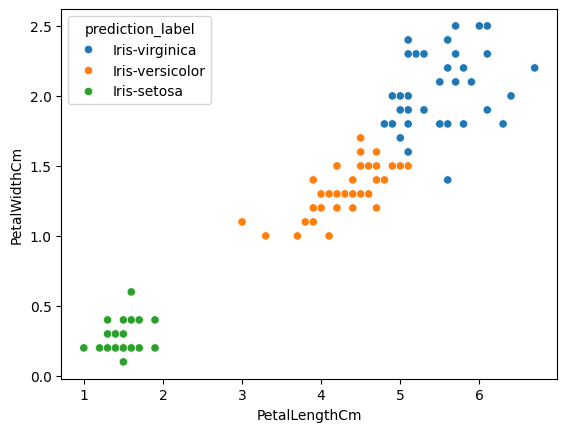

In [591]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="prediction_label", data=df_prediction)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

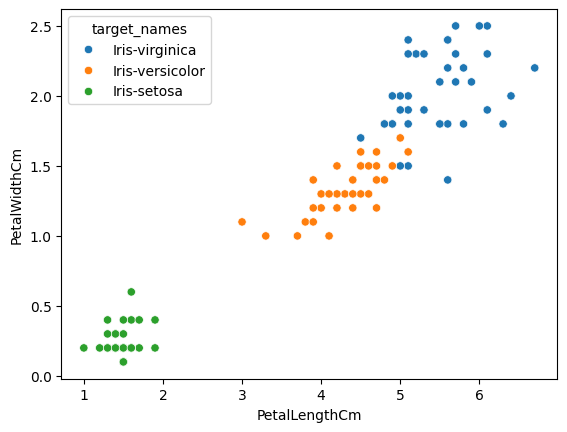

In [592]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="target_names", data=df_prediction)

##### Créons deux graphes fois 2 afin de faire notre comparaison pour la prédiction_correcte et la prédiction_incorrecte après on a utlisé     axs[3].set_visible(False) pour supprimer le dernier rectangle dont on a pas besoin 


In [593]:
def plot_incorrect_prediction(df_prediction, x_axis_feature, y_axis_feature):
    fig,axs= plt.subplots(2,2, figsize=(10,10))
    axs=axs.flatten()
    sns.scatterplot(x=x_axis_feature,y= y_axis_feature, hue="prediction_label", data=df_prediction, ax=axs[0])
    sns.scatterplot(x=x_axis_feature,y= y_axis_feature, hue="target_names", data=df_prediction, ax=axs[1])
    sns.scatterplot(x=x_axis_feature,y= y_axis_feature, hue="correct_prediction", data=df_prediction, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

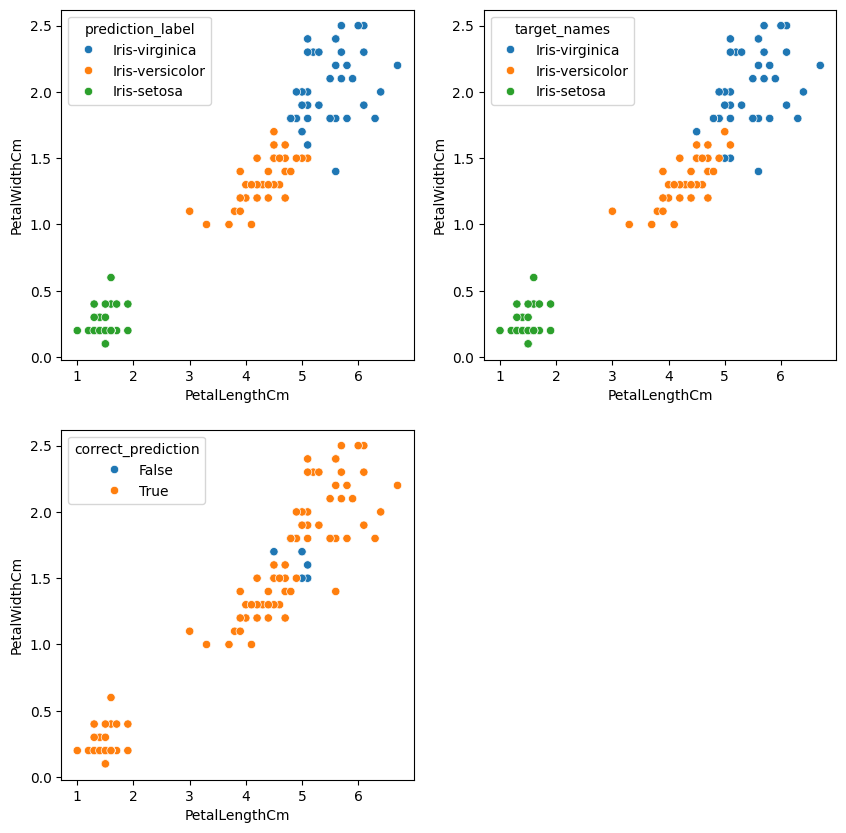

In [594]:
plot_incorrect_prediction(df_prediction, "PetalLengthCm", "PetalWidthCm")

### Réglage du modèle : c'est éssayer de déterminer les paramètres de ce modèle

In [595]:
from sklearn.ensemble import RandomForestClassifier

In [596]:
for reg_param in (0.1,0.3, 0.9, 1, 2, 5):
    print(reg_param)
    model = LogisticRegression(max_iter=200 , C=reg_param)
    accuracies =cross_val_score(model, X, y, cv=5,scoring="accuracy")
    print(f"accuracy:{np.mean(accuracies)*100:.2f}%")

0.1
accuracy:94.67%
0.3
accuracy:96.00%
0.9
accuracy:96.67%
1
accuracy:97.33%
2
accuracy:97.33%
5
accuracy:97.33%


### Modèle finale qu'on pourra définitivement utilisé pour les fleurs 

In [597]:
model = LogisticRegression(max_iter=200 , C=1)


### Dans quelle mesure notre modèle fonctionne-t-il sur l'ensemble de test

In [617]:
X_test = df_test.drop(columns=["target", "target_names"]).values


In [619]:
y_test = df_test["target"].values

In [620]:
X_test.shape

(38, 5)

In [621]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1], dtype=int8)

### Entraînons notre modèle final en utilisant notre base de données finales

In [602]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


#####                                        CONCLUSION
L’étude du jeu de données Iris à l’aide de la régression logistique montre que ce modèle permet de prédire efficacement à 97.33% l’espèce d’une fleur à partir de ses caractéristiques morphologiques. Grâce à la préparation des données et à la séparation entre apprentissage et test, le modèle atteint une bonne précision et met en évidence la relation entre les dimensions des pétales et sépales et les différentes espèces d’iris.
Cette expérience illustre la simplicité et la fiabilité de la régression logistique pour des tâches de classification supervisée.